# Group 19: Sujay Chebbi, Patricia Schutter, Daniel Stern
# NYC Restaurants

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

## Question 1
### Create a unique name for each restaurant.

In [3]:
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO']

In [4]:
df[['RESTAURANT']][:10]

,RESTAURANT
0,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...


## Question 2
### How many restaurants are included in the data?

In [5]:
df[['RESTAURANT']].drop_duplicates()

,RESTAURANT
0,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
16,MAY MAY KITCHEN 1269 SUTTER AVENUE 11208 BROOKLYN
22,SEUDA FOODS 705 KINGS HIGHWAY 11223 BROOKLYN
...,...
44621,Andy's Cuisine Restaurant 1444 WILLIAMSBRIDGE ...
44622,YUMMY SZECHUAN HOUSE 4026 UNION ST 11354 QUEENS
44627,NEW WORLD FAST FOOD 4021 MAIN ST 11354 QUEENS
44628,EARLY 967 MANHATTAN AVE 11222 BROOKLYN


In [6]:
print("There are" ,len(df['RESTAURANT'].drop_duplicates()), "unique restaurants.")

There are 10114 unique restaurants.


## Question 3
### How many chains are there?

In [7]:
mask1 = df[['DBA', 'RESTAURANT', 'BORO']].drop_duplicates('RESTAURANT')

In [8]:
chains = mask1['DBA'].value_counts()[mask1['DBA'].value_counts() > 1]

In [9]:
chains

SUBWAY              144
MCDONALD'S           79
STARBUCKS COFFEE     74
DUNKIN' DONUTS       69
DUNKIN DONUTS        64
                   ... 
PANDA HOUSE           2
DEE DAA               2
COPPOLA'S             2
MY PIZZA              2
SAM'S RESTAURANT      2
Name: DBA, Length: 368, dtype: int64

In [10]:
print("There are", len(chains), "chains.")

There are 368 chains.


## Question 4
### Plot a bar graph of the top 20 most popular chains.

Text(0, 0.5, 'Number of locations')

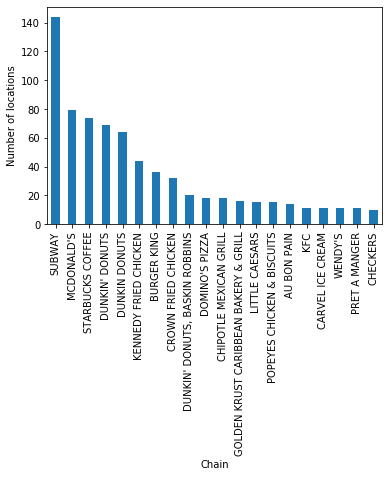

In [11]:
chains[:20].plot(kind="bar")
xlabel("Chain")
ylabel("Number of locations")

## Question 5
### What fraction of all restaurants are chain restaurants?

In [12]:
chains_total = chains.sum()

In [13]:
chains_total

1666

In [14]:
chains_total_frac = chains_total / len(df['RESTAURANT'].drop_duplicates())
print("The fraction of chain restaurants is", chains_total_frac)

The fraction of chain restaurants is 0.16472216729286138


## Question 6
### Plot the number of non-chain restaurants in each boro.

In [15]:
solo_restaurants = mask1['DBA'].value_counts()[mask1['DBA'].value_counts() < 2]

In [16]:
solo_restaurants

BALUCHI'S                     1
LUCIEN RESTAURAUNT            1
VESUVIO RESTAURANT & PIZZA    1
THE JUICE BAR                 1
MRS. MAXWELL'S BAKERY         1
                             ..
KIN SHOP                      1
GRAN PIATTO D'ORO             1
ZAITZEFF                      1
SHRINE/YATENGA                1
GLORIA                        1
Name: DBA, Length: 8448, dtype: int64

In [17]:
mask2 = df[['DBA', 'RESTAURANT', 'BORO']].drop_duplicates('RESTAURANT')

In [18]:
non_chains = mask2[mask2.groupby('DBA')['RESTAURANT'].transform("size") == 1]

In [19]:
non_chains

,DBA,RESTAURANT,BORO
5,TOV KOSHER KITCHEN,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS,QUEENS
9,BRUNOS ON THE BOULEVARD,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...,QUEENS
16,MAY MAY KITCHEN,MAY MAY KITCHEN 1269 SUTTER AVENUE 11208 BROOKLYN,BROOKLYN
22,SEUDA FOODS,SEUDA FOODS 705 KINGS HIGHWAY 11223 BROOKLYN,BROOKLYN
26,NORDIC DELICACIES,NORDIC DELICACIES 6909 3 AVENUE 11209 BROOKLYN,BROOKLYN
...,...,...,...
44621,Andy's Cuisine Restaurant,Andy's Cuisine Restaurant 1444 WILLIAMSBRIDGE ...,BRONX
44622,YUMMY SZECHUAN HOUSE,YUMMY SZECHUAN HOUSE 4026 UNION ST 11354 QUEENS,QUEENS
44627,NEW WORLD FAST FOOD,NEW WORLD FAST FOOD 4021 MAIN ST 11354 QUEENS,QUEENS
44628,EARLY,EARLY 967 MANHATTAN AVE 11222 BROOKLYN,BROOKLYN


In [20]:
non_chains_per_boro = non_chains['BORO'].value_counts().drop('Missing')

Text(0, 0.5, 'Number of non chain restaurants')

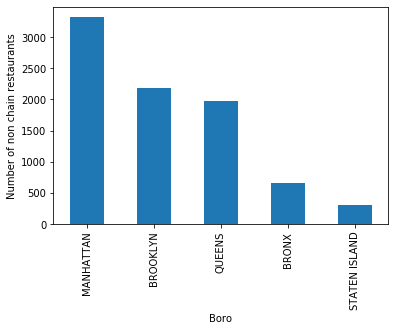

In [21]:
non_chains_per_boro.plot(kind = "bar")
xlabel("Boro")
ylabel("Number of non chain restaurants")

## Question 7
### Plot the *fraction* of non-chain restaurants in each boro.

In [22]:
mask2 = df[['DBA', 'RESTAURANT', 'BORO']].drop_duplicates('RESTAURANT')

In [23]:
restaurants_per_boro = mask2['BORO'].value_counts().drop('Missing')

In [24]:
restaurants_per_boro

MANHATTAN        4001
BROOKLYN         2529
QUEENS           2321
BRONX             855
STATEN ISLAND     394
Name: BORO, dtype: int64

In [25]:
non_chains_per_boro

MANHATTAN        3323
BROOKLYN         2180
QUEENS           1968
BRONX             659
STATEN ISLAND     312
Name: BORO, dtype: int64

In [26]:
non_chain_frac_per_boro = non_chains_per_boro / restaurants_per_boro

In [27]:
non_chain_frac_per_boro

MANHATTAN        0.830542
BROOKLYN         0.862001
QUEENS           0.847910
BRONX            0.770760
STATEN ISLAND    0.791878
Name: BORO, dtype: float64

Text(0, 0.5, 'Fraction of non chain restaurants relative to total restaurants')

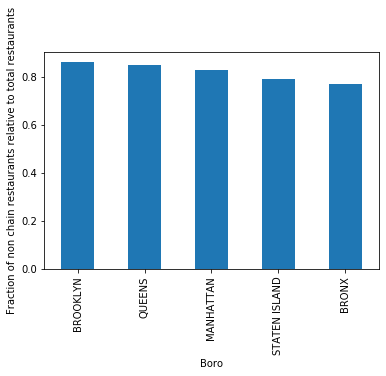

In [28]:
non_chain_frac_per_boro.sort_values(ascending = False).plot(kind = "bar")
xlabel("Boro")
ylabel("Fraction of non chain restaurants relative to total restaurants")

## Question 8
### Plot the popularity of cuisines.

In [29]:
mask3 = df[['CUISINE DESCRIPTION', 'VIOLATION CODE' ,'RESTAURANT']].drop_duplicates('RESTAURANT')

In [30]:
mask3

,CUISINE DESCRIPTION,VIOLATION CODE,RESTAURANT
0,Hamburgers,06C,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5,Jewish/Kosher,02B,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9,American,04L,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
16,Chinese,02B,MAY MAY KITCHEN 1269 SUTTER AVENUE 11208 BROOKLYN
22,Jewish/Kosher,04L,SEUDA FOODS 705 KINGS HIGHWAY 11223 BROOKLYN
...,...,...,...
44621,Caribbean,NaN,Andy's Cuisine Restaurant 1444 WILLIAMSBRIDGE ...
44622,Chinese,02G,YUMMY SZECHUAN HOUSE 4026 UNION ST 11354 QUEENS
44627,Other,10F,NEW WORLD FAST FOOD 4021 MAIN ST 11354 QUEENS
44628,Sandwiches/Salads/Mixed Buffet,NaN,EARLY 967 MANHATTAN AVE 11222 BROOKLYN


In [31]:
restaurants_per_cuisine = mask3['CUISINE DESCRIPTION'].value_counts()

In [32]:
popular_cuisines = restaurants_per_cuisine[:20]

In [33]:
popular_cuisines

American                                                            2238
Chinese                                                             1098
Café/Coffee/Tea                                                      498
Pizza                                                                482
Italian                                                              451
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     391
Japanese                                                             340
Mexican                                                              339
Bakery                                                               326
Spanish                                                              311
Caribbean                                                            287
Pizza/Italian                                                        217
Donuts                                                               176
Hamburgers                                         

Text(0, 0.5, 'Number of restaurants')

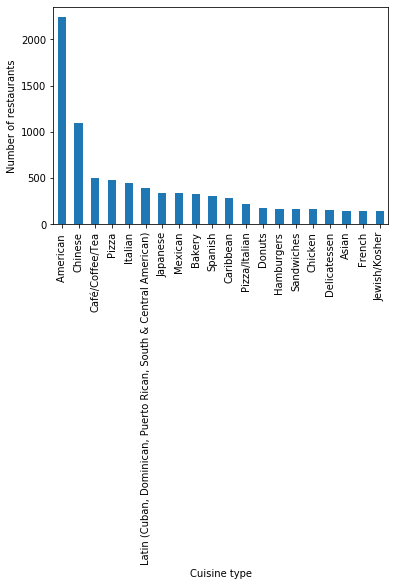

In [34]:
popular_cuisines.plot(kind = "bar")
xlabel("Cuisine type")
ylabel("Number of restaurants")

## Question 9 
### Plot the cuisines among restaurants which never got cited for violations.

In [35]:
mask4 = mask3[mask3['VIOLATION CODE'].isnull()]

In [36]:
mask4

,CUISINE DESCRIPTION,VIOLATION CODE,RESTAURANT
30,American,NaN,GLORIOUS FOOD 522 EAST 74 STREET 10021 MANHA...
121,Donuts,NaN,NOSTRAND DONUT SHOP 1449 NOSTRAND AVENUE 11226...
131,French,NaN,LE PERIGORD 405 EAST 52 STREET 10022 MANHATTAN
143,Chinese,NaN,KING YUM RESTAURANT 181-08 UNION TURNPIKE 1136...
180,American,NaN,NANCY WHISKEY PUB 1 LISPENARD STREET 10013 MAN...
...,...,...,...
44527,Italian,NaN,CIMINNA CAFE 2224 HYLAN BLVD 10306 STATEN ISLAND
44618,Pizza/Italian,NaN,ROB & TONY'S PIZZERIA 6635 GRAND AVE ...
44621,Caribbean,NaN,Andy's Cuisine Restaurant 1444 WILLIAMSBRIDGE ...
44628,Sandwiches/Salads/Mixed Buffet,NaN,EARLY 967 MANHATTAN AVE 11222 BROOKLYN


In [37]:
mask5 = mask4[['CUISINE DESCRIPTION', 'RESTAURANT']].drop_duplicates('RESTAURANT')

In [38]:
mask5

,CUISINE DESCRIPTION,RESTAURANT
30,American,GLORIOUS FOOD 522 EAST 74 STREET 10021 MANHA...
121,Donuts,NOSTRAND DONUT SHOP 1449 NOSTRAND AVENUE 11226...
131,French,LE PERIGORD 405 EAST 52 STREET 10022 MANHATTAN
143,Chinese,KING YUM RESTAURANT 181-08 UNION TURNPIKE 1136...
180,American,NANCY WHISKEY PUB 1 LISPENARD STREET 10013 MAN...
...,...,...
44527,Italian,CIMINNA CAFE 2224 HYLAN BLVD 10306 STATEN ISLAND
44618,Pizza/Italian,ROB & TONY'S PIZZERIA 6635 GRAND AVE ...
44621,Caribbean,Andy's Cuisine Restaurant 1444 WILLIAMSBRIDGE ...
44628,Sandwiches/Salads/Mixed Buffet,EARLY 967 MANHATTAN AVE 11222 BROOKLYN


In [39]:
clean_cuisines = mask5['CUISINE DESCRIPTION'].value_counts()

In [40]:
most_clean_cuisines = clean_cuisines[:20]

In [41]:
most_clean_cuisines

American                                                            68
Chinese                                                             47
Pizza                                                               17
Café/Coffee/Tea                                                     16
Italian                                                             12
Bakery                                                              12
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    12
Japanese                                                            10
Spanish                                                              8
Other                                                                7
Asian                                                                7
Donuts                                                               6
Delicatessen                                                         6
Mexican                                                              6
Pizza/

Text(0, 0.5, 'Number of clean restaurants')

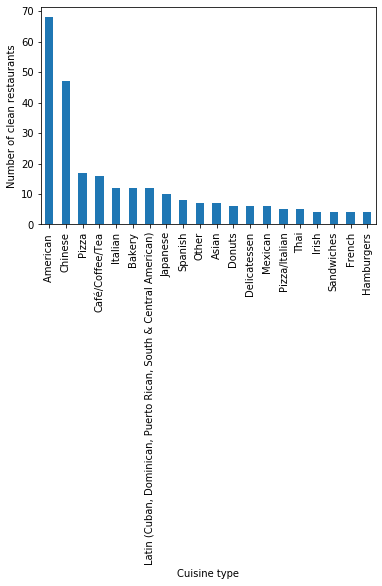

In [42]:
most_clean_cuisines.plot(kind = "bar")
xlabel("Cuisine type")
ylabel("Number of clean restaurants")

## Question 10
### What cuisines tend to be the "cleanest"?

In [43]:
over_twenty = restaurants_per_cuisine[restaurants_per_cuisine >= 20]

In [44]:
over_twenty

American                                                            2238
Chinese                                                             1098
Café/Coffee/Tea                                                      498
Pizza                                                                482
Italian                                                              451
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     391
Japanese                                                             340
Mexican                                                              339
Bakery                                                               326
Spanish                                                              311
Caribbean                                                            287
Pizza/Italian                                                        217
Donuts                                                               176
Hamburgers                                         

In [45]:
clean_cuisines

American                                                            68
Chinese                                                             47
Pizza                                                               17
Café/Coffee/Tea                                                     16
Italian                                                             12
Bakery                                                              12
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    12
Japanese                                                            10
Spanish                                                              8
Other                                                                7
Asian                                                                7
Donuts                                                               6
Delicatessen                                                         6
Mexican                                                              6
Pizza/

In [46]:
over_twenty.index

Index(['American ', 'Chinese', 'Café/Coffee/Tea', 'Pizza', 'Italian',
       'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
       'Japanese', 'Mexican', 'Bakery', 'Spanish', 'Caribbean',
       'Pizza/Italian', 'Donuts', 'Hamburgers', 'Sandwiches', 'Chicken',
       'Delicatessen', 'Asian', 'French', 'Jewish/Kosher', 'Indian', 'Thai',
       'Korean', 'Sandwiches/Salads/Mixed Buffet', 'Other',
       'Juice, Smoothies, Fruit Salads', 'Mediterranean', 'Middle Eastern',
       'Ice Cream, Gelato, Yogurt, Ices', 'Bagels/Pretzels', 'Irish',
       'Tex-Mex', 'Greek', 'Seafood', 'Vegetarian', 'Russian', 'Turkish',
       'Chinese/Japanese', 'Steak', 'Vietnamese/Cambodian/Malaysia',
       'Peruvian', 'African',
       'Bottled beverages, including water, sodas, juices, etc.',
       'Eastern European', 'Soul Food', 'Continental', 'Barbecue',
       'Soups & Sandwiches', 'Bangladeshi'],
      dtype='object')

In [47]:
clean_cuisines.index

Index(['American ', 'Chinese', 'Pizza', 'Café/Coffee/Tea', 'Italian', 'Bakery',
       'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
       'Japanese', 'Spanish', 'Other', 'Asian', 'Donuts', 'Delicatessen',
       'Mexican', 'Pizza/Italian', 'Thai', 'Irish', 'Sandwiches', 'French',
       'Hamburgers', 'Chicken', 'Vietnamese/Cambodian/Malaysia',
       'Sandwiches/Salads/Mixed Buffet', 'Korean', 'Middle Eastern',
       'Juice, Smoothies, Fruit Salads', 'Caribbean', 'Soul Food',
       'Bagels/Pretzels', 'Greek', 'Indian', 'Creole', 'Tex-Mex',
       'Continental', 'Jewish/Kosher', 'Afghan', 'Barbecue',
       'Soups & Sandwiches', 'Ice Cream, Gelato, Yogurt, Ices', 'Salads',
       'Chinese/Cuban', 'Turkish', 'African', 'Russian', 'Peruvian',
       'Mediterranean', 'Chinese/Japanese'],
      dtype='object')

In [48]:
frac_clean_restaurants = clean_cuisines / over_twenty

In [49]:
frac_clean_restaurants.sort_values(ascending = False)[:10]

Vietnamese/Cambodian/Malaysia    0.093750
Soul Food                        0.090909
Other                            0.067961
Irish                            0.057143
Asian                            0.047945
Soups & Sandwiches               0.047619
Barbecue                         0.047619
Continental                      0.047619
Chinese                          0.042805
Delicatessen                     0.039216
Name: CUISINE DESCRIPTION, dtype: float64

## Question 11
### What are the most common violations in each borough?

In [50]:
df['dummy'] = 1
pivoted = pd.pivot_table(df,
                      index = 'BORO',
                      columns = 'VIOLATION DESCRIPTION',
                      values = 'dummy',
                      aggfunc = sum,
                      fill_value = 0)
pivoted

VIOLATION DESCRIPTION,"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,''''Wash hands sign not posted at hand wash facility.,"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",Accurate thermometer not provided in refrigerated or hot holding equipment.,"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",Ashtray present in smoke-free area.,"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.","Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.","Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.",...,"Smoke free workplace smoking policy inadequate, not posted, not provided to employees.",Thawing procedures improper.,"The original nutritional fact labels and/or ingredient label for a cooking oil, shortening or margarine or food item sold in bulk, or acceptable manufacturers documentation not maintained on site.","Tobacco use, eating, or drinking from open container in food preparation, food storage or dishwashing area observed.","Toilet facility not maintained and provided with toilet paper, waste receptacle and self-closing door.",Toilet facility not provided for employees or for patrons when required.,Toilet facility used by women does not have at least one covered garbage receptacle.,"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",Unprotected food re-served.,Wiping cloths soiled or not stored in sanitizing solution.
BORO,,,,,,,,,,,,,,,,,,,,,
BRONX,12,1,21,5,21,27,4,20,0,0,...,45,36,48,22,46,2,1,2,1,47
BROOKLYN,40,5,57,12,76,120,4,93,4,0,...,222,109,125,55,142,3,5,8,0,198
MANHATTAN,49,6,93,19,98,162,5,168,6,0,...,264,151,198,107,225,11,7,15,1,285
Missing,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
QUEENS,29,4,60,24,92,85,8,80,5,1,...,154,100,151,64,134,3,2,20,0,168
STATEN ISLAND,5,1,8,3,16,17,1,10,1,0,...,22,23,25,7,14,1,1,3,0,25


In [51]:
no_missing = pivoted[pivoted.index != 'Missing']

In [52]:
no_missing

VIOLATION DESCRIPTION,"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,''''Wash hands sign not posted at hand wash facility.,"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",Accurate thermometer not provided in refrigerated or hot holding equipment.,"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",Ashtray present in smoke-free area.,"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.","Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.","Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.",...,"Smoke free workplace smoking policy inadequate, not posted, not provided to employees.",Thawing procedures improper.,"The original nutritional fact labels and/or ingredient label for a cooking oil, shortening or margarine or food item sold in bulk, or acceptable manufacturers documentation not maintained on site.","Tobacco use, eating, or drinking from open container in food preparation, food storage or dishwashing area observed.","Toilet facility not maintained and provided with toilet paper, waste receptacle and self-closing door.",Toilet facility not provided for employees or for patrons when required.,Toilet facility used by women does not have at least one covered garbage receptacle.,"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",Unprotected food re-served.,Wiping cloths soiled or not stored in sanitizing solution.
BORO,,,,,,,,,,,,,,,,,,,,,
BRONX,12,1,21,5,21,27,4,20,0,0,...,45,36,48,22,46,2,1,2,1,47
BROOKLYN,40,5,57,12,76,120,4,93,4,0,...,222,109,125,55,142,3,5,8,0,198
MANHATTAN,49,6,93,19,98,162,5,168,6,0,...,264,151,198,107,225,11,7,15,1,285
QUEENS,29,4,60,24,92,85,8,80,5,1,...,154,100,151,64,134,3,2,20,0,168
STATEN ISLAND,5,1,8,3,16,17,1,10,1,0,...,22,23,25,7,14,1,1,3,0,25


In [53]:
no_missing.T.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

In [54]:
no_missing.T.max()

BORO
BRONX             500
BROOKLYN         1485
MANHATTAN        2417
QUEENS           1416
STATEN ISLAND     230
dtype: int64

In [55]:
most_common = DataFrame({'Most Common Violation':no_missing.T.idxmax(),'Number of Complains':no_missing.T.max()})

In [56]:
most_common

,Most Common Violation,Number of Complains
BORO,,
BRONX,Non-food contact surface improperly constructe...,500
BROOKLYN,Non-food contact surface improperly constructe...,1485
MANHATTAN,Non-food contact surface improperly constructe...,2417
QUEENS,Non-food contact surface improperly constructe...,1416
STATEN ISLAND,Non-food contact surface improperly constructe...,230


## Question 12
### What are the most common violations per borough, *after normalizing for the relative abundance of each violation?*

In [57]:
new_pivot = no_missing.T

new_pivot

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16
...,...,...,...,...,...
Toilet facility not provided for employees or for patrons when required.,2,3,11,3,1
Toilet facility used by women does not have at least one covered garbage receptacle.,1,5,7,2,1
"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",2,8,15,20,3


In [58]:
new_pivot['violationFrequency'] = new_pivot['BRONX'] + new_pivot['MANHATTAN'] + new_pivot['BROOKLYN'] + new_pivot['QUEENS'] + new_pivot['STATEN ISLAND']

new_pivot

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,violationFrequency
VIOLATION DESCRIPTION,,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5,135
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1,17
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8,239
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3,63
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16,303
...,...,...,...,...,...,...
Toilet facility not provided for employees or for patrons when required.,2,3,11,3,1,20
Toilet facility used by women does not have at least one covered garbage receptacle.,1,5,7,2,1,16
"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",2,8,15,20,3,48


In [59]:
normal_BRONX = new_pivot['BRONX'] / new_pivot['violationFrequency']

normal_BRONX.sort_values(ascending = False).index[0]

print("The most common normalized violation in the Bronx is:", normal_BRONX.sort_values(ascending = False).index[0])

The most common normalized violation in the Bronx is: Unprotected food re-served.


In [60]:
normal_BROOKLYN = new_pivot['BROOKLYN'] / new_pivot['violationFrequency']

normal_BROOKLYN.sort_values(ascending = False).index[0]

print("The most common normalized violation in Brooklyn is:", normal_BROOKLYN.sort_values(ascending = False).index[0])

The most common normalized violation in Brooklyn is: Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours.


In [61]:
normal_MANHATTAN = new_pivot['MANHATTAN'] / new_pivot['violationFrequency']

normal_MANHATTAN.sort_values(ascending = False).index[0]

print("The most common normalized violation in Manhattan is:", normal_MANHATTAN.sort_values(ascending = False).index[0])

The most common normalized violation in Manhattan is: Out-of package sale of tobacco products observed.


In [62]:
normal_QUEENS = new_pivot['QUEENS'] / new_pivot['violationFrequency']

normal_QUEENS.sort_values(ascending = False).index[0]

print("The most common normalized violation in Queens is:", normal_QUEENS.sort_values(ascending = False).index[0])

# There were 3 violation descriptions that were 100% from Queens, but we chose to display only one.

The most common normalized violation in Queens is: Harmful, noxious gas or vapor detected. CO ~1 3 ppm.


In [63]:
normal_STATEN_ISLAND = new_pivot['STATEN ISLAND'] / new_pivot['violationFrequency']

normal_STATEN_ISLAND.sort_values(ascending = False).index[0]

print("The most common normalized violation in Staten Island is:", normal_STATEN_ISLAND.sort_values(ascending = False).index[0])

The most common normalized violation in Staten Island is: Eggs found dirty/cracked; liquid, frozen or powdered eggs not pasteurized.


## Question 13
### How many phone area codes correspond to a single zipcode?

In [64]:
zip = df['ZIPCODE']

In [65]:
phone = pd.Series(df['PHONE'].str[:3])

In [66]:
zip_phone = pd.concat([zip, phone], axis = 1).drop_duplicates("PHONE", keep = False)

In [67]:
zip_phone

,ZIPCODE,PHONE
30522,10018,410
33048,11372,954
36336,11215,615
39885,11220,728
39941,10461,855
41978,10012,970
42482,10465,905
42800,11226,171
43500,11217,702


In [68]:
len(zip_phone)

9

## Question 14
### Find common misspellings of street names.

In [69]:
# Create new column 'STREET TYPE' that contains last element

df['STREET TYPE'] = df['STREET'].apply(lambda x: x.split()[-1] if len(x.split()) > 1 else " ")

In [70]:
# Create new column 'STREET BASE' that does not contain last element

df['STREET BASE'] = df['STREET'].apply(lambda x: ' '.join(map(str, x.split()[:-1]) if len(x.split()[:-1]) > 0 else x))

In [71]:
# Create new column that combines street base and zipcode

cols = ['STREET BASE','ZIPCODE']

df['STREET BASE & ZIP'] = df[cols].apply(lambda row: " ".join(row.values.astype(str)), axis = 1)

In [72]:
# New table containing STREET TYPE, STREET BASE, STREET BASE & ZIP

new_df = df[['STREET TYPE', 'STREET BASE', 'STREET BASE & ZIP']].drop_duplicates().dropna()

new_df

,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,AVENUE,FLATBUSH,FLATBUSH 11225
5,ROAD,63,63 11374
9,BOULEVARD,ASTORIA,ASTORIA 11369
16,AVENUE,SUTTER,SUTTER 11208
22,HIGHWAY,KINGS,KINGS 11223
...,...,...,...
44613,ST,9TH,9TH 11101
44617,AVE,ROGERS,ROGERS 11216
44618,AVE,GRAND,GRAND 11378
44619,ST,E 48TH,E 48TH 10017


In [73]:
# Merge df on itself on the STREET BASE & ZIP column

merge_df = new_df.merge(new_df, on = 'STREET BASE & ZIP')

merge_df

,STREET TYPE_x,STREET BASE_x,STREET BASE & ZIP,STREET TYPE_y,STREET BASE_y
0,AVENUE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
1,AVENUE,FLATBUSH,FLATBUSH 11225,AVE,FLATBUSH
2,AVE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
3,AVE,FLATBUSH,FLATBUSH 11225,AVE,FLATBUSH
4,ROAD,63,63 11374,ROAD,63
...,...,...,...,...,...
3728,AVE,GREENE,GREENE 11216,AVE,GREENE
3729,ST,9TH,9TH 11101,ST,9TH
3730,AVE,ROGERS,ROGERS 11216,AVE,ROGERS
3731,ST,E 48TH,E 48TH 10017,ST,E 48TH


In [74]:
# From the merged table, select only the rows where the street types are different

merge_df = merge_df[merge_df['STREET TYPE_x'] != merge_df['STREET TYPE_y']]

merge_df

,STREET TYPE_x,STREET BASE_x,STREET BASE & ZIP,STREET TYPE_y,STREET BASE_y
1,AVENUE,FLATBUSH,FLATBUSH 11225,AVE,FLATBUSH
2,AVE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
5,ROAD,63,63 11374,DRIVE,63
6,DRIVE,63,63 11374,ROAD,63
12,AVENUE,CHURCH,CHURCH 11218,AVE,CHURCH
...,...,...,...,...,...
3355,AVENUE,PATCHEN,PATCHEN 11233,AVE,PATCHEN
3443,STREET,48,48 11101,AVENUE,48
3444,AVENUE,48,48 11101,STREET,48
3496,PARKWAY,HUTCHINSON RIVER,HUTCHINSON RIVER 10465,PKWY,HUTCHINSON RIVER


In [75]:
# Cross-Tabulation

cross_tab = pd.crosstab(index = merge_df['STREET TYPE_x'], columns = merge_df['STREET TYPE_y']).reset_index()

l = ['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']

filtered_cross_tab = cross_tab[cross_tab['STREET TYPE_x'].isin(l)]

In [76]:
filtered_cross_tab.head()

STREET TYPE_y,STREET TYPE_x,A,AAVENUE,AIRPOR,AIRPORT,AVE,AVENUE,AVEUE,B,BLVD,...,SW,TERMINAL,TPKE,TURNPIKE,U,V,W,WEST,X,Z
4,AVE,0,1,0,0,0,163,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,BOULEARD,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11,BULEVARD,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
40,PL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,RD,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
def most_common_street(df):
    
    c = [i for i in df.columns if i not in['STREET TYPE_y', 'STREET TYPE_x']]
    common_list = []
    
    for i in range(len(df)):
        common_list.append([df['STREET TYPE_x'].iloc[i], df[c].iloc[i].sort_values(ascending = False).index[0]])
    
    return common_list

In [78]:
most_common_street(filtered_cross_tab)

[['AVE', 'AVENUE'],
 ['BOULEARD', 'BLVD'],
 ['BULEVARD', 'BLVD'],
 ['PL', 'PLACE'],
 ['RD', 'ROAD'],
 ['ST', 'STREET']]